Part of [iPyMacLern](http://ekaakurniawan.github.io/iPyMacLern/) project.

> Copyright (C) 2015 by Eka A. Kurniawan
> 
> eka.a.kurniawan(ta)gmail(tod)com
> 
> This program is free software: you can redistribute it and/or modify
> it under the terms of the GNU General Public License as published by
> the Free Software Foundation, either version 3 of the License, or
> (at your option) any later version.
> 
> This program is distributed in the hope that it will be useful,
> but WITHOUT ANY WARRANTY; without even the implied warranty of
> MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
> GNU General Public License for more details.
> 
> You should have received a copy of the GNU General Public License
> along with this program.  If not, see <http://www.gnu.org/licenses/>.

### Tested On

In [1]:
import sys
print("Python %d.%d.%d" % (sys.version_info.major, \
                           sys.version_info.minor, \
                           sys.version_info.micro))

Python 3.3.5


In [2]:
import numpy as np
print("NumPy %s" % np.__version__)

NumPy 1.8.1


In [3]:
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib %s" % matplotlib.__version__)

matplotlib 1.3.1


### Display Settings

In [4]:
# Display graph inline
%matplotlib inline

# Display graph in 'retina' format for Mac with retina display. Others, use PNG or SVG format.
%config InlineBackend.figure_format = 'retina'
#%config InlineBackend.figure_format = 'PNG'
#%config InlineBackend.figure_format = 'SVG'

# For displaying 3D graph
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

---

# Linear Regression With Multiple Variables[1]

We are going to use linear regression method with two variables/features (house size and total bedroom) to predict the price of the house.

### Get and Plot Data

In [5]:
filename = 'ex1data2.txt'
data = np.recfromcsv(filename, delimiter=',', names=['size', 'ttl_bedrooms', 'price'])

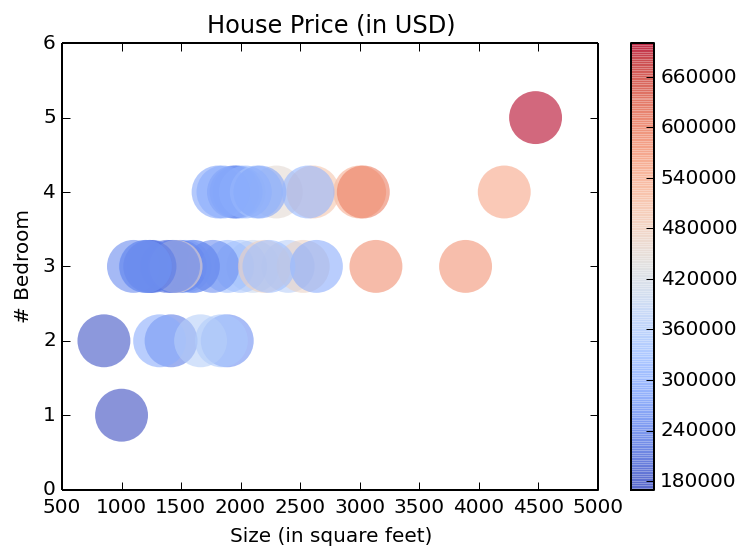

In [6]:
plt.scatter(data['size'], data['ttl_bedrooms'], c=data['price'], 
            s=700, cmap=cm.coolwarm, alpha=0.6, edgecolors='none')
plt.title('House Price (in USD)')
plt.xlabel('Size (in square feet)')
plt.ylabel('# Bedroom')
plt.colorbar()
plt.show()

Another way to look at the data.

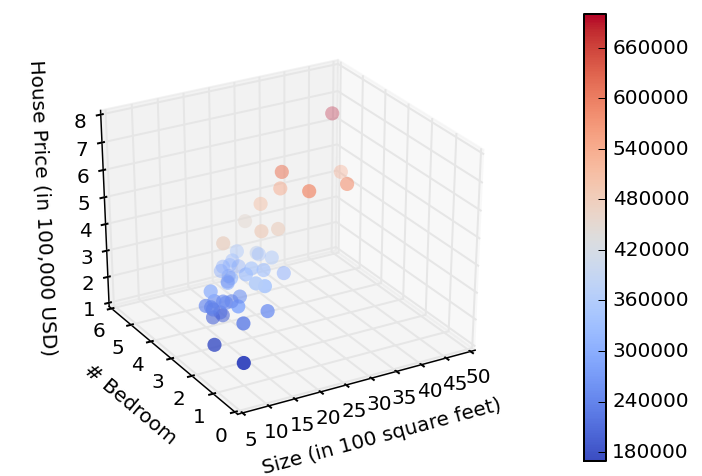

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim =-120)
ax.dist = 11

scatter = ax.scatter3D(data['size'] / 100, data['ttl_bedrooms'], data['price'] / 100000,
                       c=data['price'], cmap=cm.coolwarm, s=50, edgecolors='none')

ax.set_xlabel('\nSize (in 100 square feet)', linespacing=2)
ax.set_ylabel('\n# Bedroom', linespacing=2)
ax.set_zlabel('\nHouse Price (in 100,000 USD)', linespacing=2)
plt.colorbar(scatter)

plt.show()

In [8]:
# Total training samples
m = len(data)

# Collect features
X = np.append(data['size'].reshape(m,1), data['ttl_bedrooms'].reshape(m,1), 1)
# Feature Normalization
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_n = (X - mu) / sigma

# Total features
n = X_n.shape[1]

# Add column of ones to variable x
X = np.append(np.ones([m,1]),X,1)
X_n = np.append(np.ones([m,1]),X_n,1)

# Output
y = data['price']

# Initialize fitting parameters
theta = np.zeros([n+1, 1])
theta_n = np.zeros([n+1, 1])

### Cost Function

For $x$ as input variable (feature) and $y$ as output/target variable, we have cost function $J$ of parameter $\theta$ as follow.

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

Where hypothesis $h_{\theta}(x)$ is the linear model as follow.

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1 + \theta_2x_2$$

And $m$ is total training samples and $i$ is the index.

In [9]:
def compute_cost(X, y, theta):
    # Total training samples
    m = len(y)
    # Calculate hypothesis
    h = np.sum(theta.transpose() * X, axis=1)
    # Calculate cost
    J = (1 / (2*m)) * sum((h - y) ** 2)
    return J

In [10]:
J = compute_cost(X, y, theta)
print(J)

65591548106.5


### Gradient Descent Algorithm

Our objective is to have the parameters ($\theta_0$, $\theta_1$ and $\theta_2$) to produce a hypothesis $h_{\theta}(x)$ as close as possible to target variable $y$. As we have defined our cost function $J(\theta)$ as the error of the two therefore all we need to do is to minimize the cost function $\left(\underset{\theta_0, \theta_1, \theta_2}{\text{minimize}} \hspace{2mm} J(\theta_0, \theta_1,\theta_2)\right)$.

Following is the algorithm where $\alpha$ is the learning rate.

>repeat until convergence {
>
>$\hspace{10mm} \theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j} J(\theta_0, \theta_1,\theta_2) \hspace{10mm} (\text{for } j=0 \text{, } j=1 \text{ and } j=2)$
>
>}

Derive cost function $J(\theta_j)$ for $j=0$, $j=1$ and $j=2$.

> $j = 0$ :
>$$\frac{\partial}{\partial\theta_0} J(\theta_0, \theta_1) =$$
>$$\frac{\partial}{\partial\theta_0} \frac{1}{2m} \sum_{i=1}^{m}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 =$$
>$$\frac{\partial}{\partial\theta_0} \frac{1}{2m} \sum_{i=1}^{m}\left(\theta_0 + \theta_1x_1^{(i)} + \theta_2x_2^{(i)} - y^{(i)}\right)^2 =$$
>$$\frac{1}{m} \sum_{i=1}^{m}\left(\theta_0 + \theta_1x^{(i)} + \theta_2x_2^{(i)} - y^{(i)}\right) =$$
>$$\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right)$$

> $j = 1$ :
>$$\frac{\partial}{\partial\theta_1} J(\theta_0, \theta_1) =$$
>$$\frac{\partial}{\partial\theta_1} \frac{1}{2m} \sum_{i=1}^{m}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 =$$
>$$\frac{\partial}{\partial\theta_1} \frac{1}{2m} \sum_{i=1}^{m}\left(\theta_0 + \theta_1x_1^{(i)} + \theta_2x_2^{(i)} - y^{(i)}\right)^2 =$$
>$$\frac{1}{m} \sum_{i=1}^{m}\left(\theta_0 + \theta_1x_1^{(i)} + \theta_2x_2^{(i)} - y^{(i)}\right).x_1^{(i)} =$$
>$$\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right).x_1^{(i)}$$

> $j = 2$ :
>$$\frac{\partial}{\partial\theta_2} J(\theta_0, \theta_1) =$$
>$$\frac{\partial}{\partial\theta_2} \frac{1}{2m} \sum_{i=1}^{m}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 =$$
>$$\frac{\partial}{\partial\theta_2} \frac{1}{2m} \sum_{i=1}^{m}\left(\theta_0 + \theta_1x_1^{(i)} + \theta_2x_2^{(i)} - y^{(i)}\right)^2 =$$
>$$\frac{1}{m} \sum_{i=1}^{m}\left(\theta_0 + \theta_1x_1^{(i)} + \theta_2x_2^{(i)} - y^{(i)}\right).x_2^{(i)} =$$
>$$\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right).x_2^{(i)}$$

For this linear case, the algorithm would be as follow.

>repeat until convergence {
>
>$\hspace{10mm} \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right)$
>
>$\hspace{10mm} \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right) . x_1^{(i)}$
>
>$\hspace{10mm} \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right) . x_2^{(i)}$
>
>}

### Vectorization

Matrix vectorization can be computed faster and it can handle flexible number of features. From the previous algorithm, we can define the collection of features $X_j^{(i)}$ to handle the feature as $[1^{(i)}, x_1^{(i)}, x_2^{(i)}]$. The algorithm can be rewritten as follow.

>repeat until convergence {
>
>$\hspace{10mm} \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right).1^{(i)}$
>
>$\hspace{10mm} \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right) . x_1^{(i)}$
>
>$\hspace{10mm} \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right) . x_2^{(i)}$
>
>}

We can then combine all features as $\theta_j$ and duplicate the error $\left(h_{\theta}(x^{(i)}) - y^{(i)}\right)$ in column wise as much as the total feature $n$ plus 1. The new vectorized algorithm is as follow.

>repeat until convergence {
>
>$\hspace{10mm} \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}(x^{(i)}) - y^{(i)}\right)_j.X_j^{(i)}$
>
>}

In [11]:
def perform_gradient_descent(X, y, theta, alpha, iterations):
    # Total training samples
    m = len(y)
    # Total features (n) plus 1
    n_1 = X.shape[1]
    # History of costs
    J_history = np.zeros([iterations, 1])
    
    for i in range(iterations):
        # Calculate hypothesis
        h = np.sum(theta.transpose() * X, axis=1)
        # Find out the error
        error = h - y
        # Duplicate the error in column wise as much as n + 1
        errors = np.asarray([error, ] * n_1).transpose()
        # Generate new theta
        theta = theta - ((alpha / m) * np.sum(errors * X, axis=0)).reshape([n_1,1])
        # Save cost history
        J_history[i] = compute_cost(X, y, theta)
        
    return theta, J_history

In [12]:
iterations = 500
alpha = 0.01

theta_n, J_history = perform_gradient_descent(X_n, y, theta, alpha, iterations)

# Unnormalize theta
theta = np.vstack([theta_n[0], (theta_n[1:] * sigma.reshape(sigma.shape[0],1)) + mu.reshape(mu.shape[0],1)])

In [13]:
theta_n

array([[  3.38175984e+05],
       [  1.03032124e+05],
       [ -2.02325233e+02]])

In [14]:
theta

array([[  3.38175984e+05],
       [  8.10061266e+07],
       [ -1.49148884e+02]])

In [15]:
J_history[:10]

array([[  6.42977763e+10],
       [  6.30310183e+10],
       [  6.17906942e+10],
       [  6.05762369e+10],
       [  5.93870917e+10],
       [  5.82227165e+10],
       [  5.70825809e+10],
       [  5.59661664e+10],
       [  5.48729661e+10],
       [  5.38024840e+10]])

### Plot Cost History

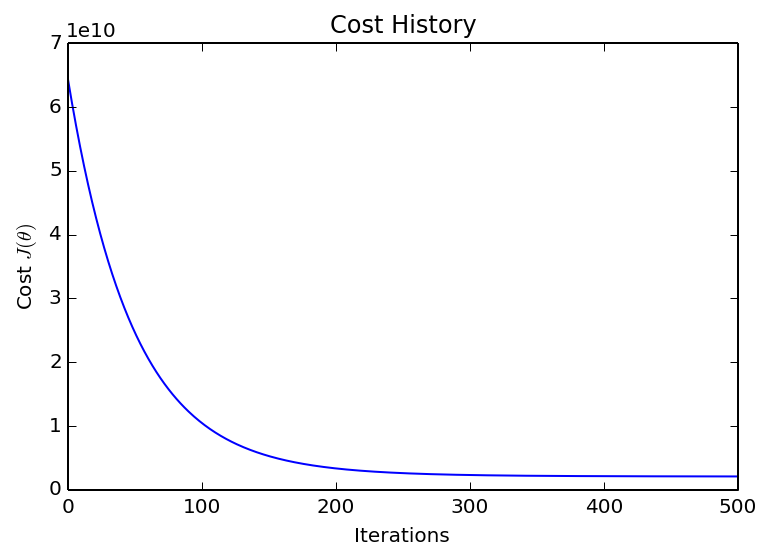

In [16]:
plt.plot(J_history)
plt.title('Cost History')
plt.xlabel('Iterations')
plt.ylabel(r'Cost $J(\theta)$')
plt.show()

### Plot Linear Fit

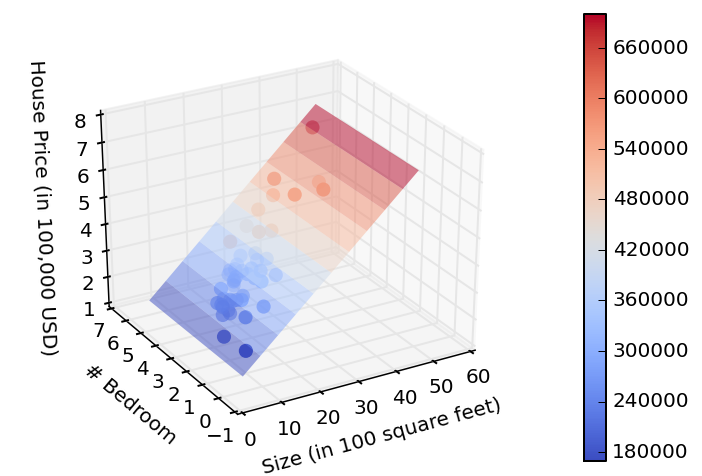

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim =-120)
ax.dist = 11

scatter = ax.scatter3D(data['size'] / 100, data['ttl_bedrooms'], data['price'] / 100000,
                       c=data['price'], cmap=cm.coolwarm, s=50, edgecolors='none')

size_vals = np.linspace(500, 5000, 100)
ttl_bedroom_vals = np.linspace(0, 6, 10)
size_mesh, ttl_bedroom_mesh = np.meshgrid(size_vals, ttl_bedroom_vals)
# normalized version
size_mesh_n = (size_mesh - mu[0]) / sigma[0]
ttl_bedroom_mesh_n = (ttl_bedroom_mesh - mu[1]) / sigma[1]
zs = np.array([np.dot([1, size_val_n, ttl_bedroom_val_n], theta_n) for size_val_n, ttl_bedroom_val_n in zip(np.ravel(size_mesh_n), np.ravel(ttl_bedroom_mesh_n))])
Z = zs.reshape(size_mesh.shape)
ax.plot_surface(size_mesh / 100, ttl_bedroom_mesh, Z / 100000, cmap=cm.coolwarm, alpha=0.5, linewidth=0)

ax.set_xlabel('\nSize (in 100 square feet)', linespacing=2)
ax.set_ylabel('\n# Bedroom', linespacing=2)
ax.set_zlabel('\nHouse Price (in 100,000 USD)', linespacing=2)
plt.colorbar(scatter)

plt.show()

### Make Prediction

Predict pricing for 1650 squared-feet with 3 bedroom house.

In [18]:
print("House pricing for 1650 squared-feet with 3 beadrooms would be %s USD" %
int(np.dot([1, (1650 - mu[0]) / sigma[0], (3 - mu[1]) / sigma[1]], theta_n)))

House pricing for 1650 squared-feet with 3 beadrooms would be 292264 USD


---

# References

1. Andrew Y. Ng, 2015. _Machine Learning_. Week 2: Linear Regression with Multiple Variables. Stanford. Coursera. https://www.coursera.org/learn/machine-learning